# Assingment Work 

Tasks: 
1.	Process the images in the fastest way possible. 
2.	Apply image stabilization technique. 
3.	background removal 
4.	background replacement 

Please also send us the below data:
1.	Output images
2.  No of the frames classified as a blur 
3.  No of the frame classified as bad lighting 
4.  Accuracy and evaluation of blur and light model.
5.  Time to process the images
6.  How can we run this on mobile devices?
7.  How could you further improve it? please describe.
8.  Would you able to write or convert the same code into C++ if needed? Yes/No
9.  Are you able to write custom code for blur/light models without OpenCV? Yes/No


In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image 
import numpy as np
import shutil, time

## Task 1: Blur Detection 
 1. Laplacian Filter 

In [82]:
# Blur Detection on an image using Laplacian filter. 
def blur_detection(img_path, threshold):
    text = "Not Blurry"
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(np.float32(img), cv2.COLOR_RGB2GRAY)
    fm = cv2.Laplacian(img, cv2.CV_64F).var()
    if fm < threshold:
        text = "Blured Image"
    
    if text == 'Blured Image':
        print( "Moving file from {0} to {1}".format(img_path, Dest_blurr))
        shutil.move(img_path, Dest_blurr)
    print(text, fm) 
    print("**************************")
        

In [89]:
print('Blur detection using Laplacian Filter with a threshold of 100')
print('*******************************')
Data = '../Data/Original_imgs/'
Dest_blurr= '../Data/Blurred_imgs/'

files = os.listdir(Data)
start = time.time()
for i in files: 
    print("Image Name: ",i)
    blur_detection(os.path.join(Data, i), 100)
stop = time.time()

total_time = stop-start
print("Time taken for {0} images to process is: {1} Sec".format(len(files), total_time))

Blur detection using Laplacian Filter with a threshold of 100
*******************************
Image Name:  1.jpg
Moving file from ../Data/Original_imgs/1.jpg to ../Data/Blurred_imgs/
Blured Image 26.68149785676186
**************************
Image Name:  view1.jpeg
Not Blurry 523.3017727650972
**************************
Image Name:  view10.jpeg
Not Blurry 166.69935339029587
**************************
Image Name:  view2.jpeg
Not Blurry 168.7394364924528
**************************
Image Name:  view3.jpeg
Not Blurry 213.6868200361709
**************************
Image Name:  view4.jpeg
Not Blurry 361.5078707935229
**************************
Image Name:  view5.jpeg
Moving file from ../Data/Original_imgs/view5.jpeg to ../Data/Blurred_imgs/
Blured Image 84.3829276713732
**************************
Image Name:  view6.jpeg
Not Blurry 213.38719698416898
**************************
Image Name:  view7.jpeg
Not Blurry 330.06189733488065
**************************
Image Name:  view8.jpeg
Not Blurry 271.

In [88]:
# shutil.move('../Data/Blurred_imgs/view5.jpeg', '../Data/Original_imgs/')
# plot image with blur data. 


'../Data/Original_imgs/view5.jpeg'

## Task 2: Bad light detection
1. Low contrast detection 
2. high contrast detection


In [122]:
from skimage.exposure import is_low_contrast

print('Low light intensity detection, with a threshold of 0.35')
print('*******************************')
Data = '../Data/Original_imgs/'
Dest_blurr= '../Data/Blurred_imgs/'

files = os.listdir(Dest_blurr)
start = time.time()
for i in files: 
    print("Image Name: ",i)
    image = cv2.imread(os.path.join(Dest_blurr,i))
    if is_low_contrast(image, 0.35):
        print("Image {0} has low intensity".format(i))
    else:
        print("Image {0} has normal intensity".format(i))
        
    print("*"*25)
stop = time.time()

total_time = stop-start
print("Time taken for {0} images to process is: {1} Sec".format(len(files), total_time))



Low light intensity detection, with a threshold of 0.35
*******************************
Image Name:  1.jpg
Image 1.jpg has normal intensity
*************************
Image Name:  1_Low_contrast.png
Image 1_Low_contrast.png has low intensity
*************************
Image Name:  view5.jpeg
Image view5.jpeg has normal intensity
*************************
Time taken for 3 images to process is: 0.8868458271026611 Sec


In [119]:
image = cv2.imread('../Data/Blurred_imgs/1_Low_contrast.png',0)
print("is :",is_low_contrast(image,0.35))

135.00732
is : False


## Task 3: Background removal 
1. MOG Background reduction 
2. Haar Cascade car detection & Grabcut
2. Yolo Car Bounding box & GrabCut
3. Mask-RCNN Car detection


2. Thorught process was to make simple bounding box predicition using Haar Cascade Car detection & apply Grabcut. 
but the predictions of the Haar Cascade was not approriate. 

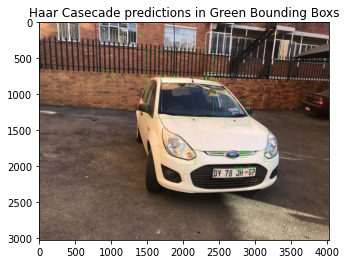

In [34]:
from PIL import Image
pil_im = Image.open('Output/Haar_car.jpg')
plt.title("Haar Casecade predictions in Green Bounding Boxs")
plt.imshow(np.asarray(pil_im))
plt.show()

In [ ]:
# Rectangel Grab Cut 
1330, 460,3171,2690
#  737, 1322, 2395, 3316 -> ROI BBox from MASK RCNN 

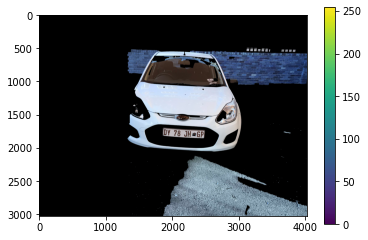

In [38]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('../Data/Original_imgs/view1.jpeg')
plt.imshow(img)
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (1330, 460,3171,2690)

cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()
plt.show()

### 3. YOLO V5 using pyTorch


Please Navigate to: Code/YOLO/yolov5/Yolo_Inference.ipynb

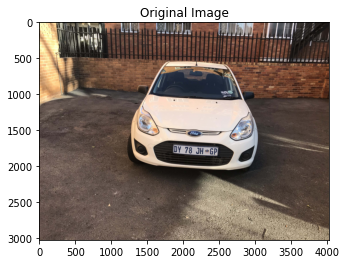

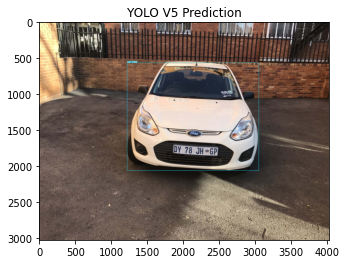

In [35]:
pil_im = Image.open('../Data/Original_imgs/view1.jpeg')
yolov5 = Image.open("YOLO/yolov5/runs/detect/exp/view1.jpeg")
plt.title("Original Image")
plt.imshow(np.asarray(pil_im))
plt.show()

plt.title("YOLO V5 Prediction")
plt.imshow(np.asarray(yolov5))
plt.show()

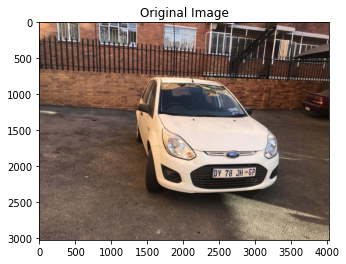

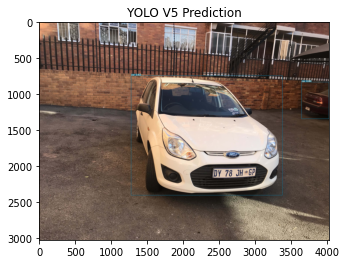

In [36]:
pil_im = Image.open('../Data/Original_imgs/view4.jpeg')
yolov5 = Image.open("YOLO/yolov5/runs/detect/exp2/view4.jpeg")
plt.title("Original Image")
plt.imshow(np.asarray(pil_im))
plt.show()

plt.title("YOLO V5 Prediction")
plt.imshow(np.asarray(yolov5))
plt.show()

### Mask RCNN Tensorflow 

Please Navigate to: Code/MRCNN/Mask_RCNN/samples/demo.ipynb

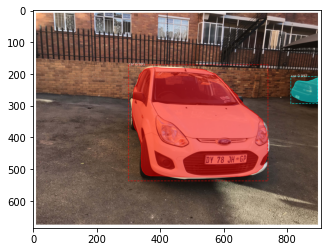

In [18]:
pil_im = Image.open('Output/MRCNN_pred.png')
plt.imshow(np.asarray(pil_im))

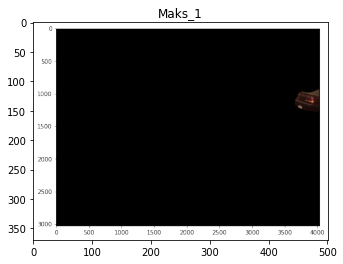

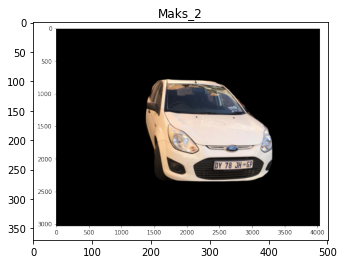

In [29]:
pil_im_1 = Image.open('Output/maks_1.png')
pil_im_2 = Image.open('Output/maks_2.png')
plt.title('Maks_1')
plt.imshow(np.asarray(pil_im_1))
plt.show()
plt.title('Maks_2')
plt.imshow(np.asarray(pil_im_2))
plt.show()

Summary: 
1. Tried Haar Cascade to detect car :: Most of the predictions were in correct or false positive (Treditional old technique)
2. Yolov5 :: Bounding box for Cars (Object detection)
3. MRCNN :: Masks of cars that are detected with confidence scores and ROIs. (Instance Segmentation) 

## Task 4: Changing the background of an image.
1. Pixellib package and deep lab V3 model
    

In [12]:
import pixellib
from pixellib.tune_bg import alter_bg

change_bg = alter_bg()
change_bg.load_pascalvoc_model("../Models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5")
output=change_bg.change_bg_img(f_image_path = "../Data/Original_imgs/view1.jpeg",b_image_path = "../Data/Blurred_imgs/1.jpg", output_image_name="new_img_background.jpg")
cv2.imwrite("../Data/Blurred_imgs/Changed_bgr_img.jpg", output)

True

In [13]:
output=change_bg.change_bg_img(f_image_path = "../Data/Original_imgs/view1.jpeg",b_image_path = "../Data/Blurred_imgs/1_Low_contrast.png", output_image_name="new_background.jpg")
cv2.imwrite("../Data/Blurred_imgs/Changed_2_bgr_img.jpg", output)

True

In [ ]:
output=change_bg.change_bg_img(f_image_path = "../Data/Original_imgs/view4.jpeg",b_image_path = "../Data/Blurred_imgs/1_Low_contrast.png", output_image_name="new_background.jpg")
cv2.imwrite("../Data/Blurred_imgs/Changed_3_bgr_img.jpg", output)

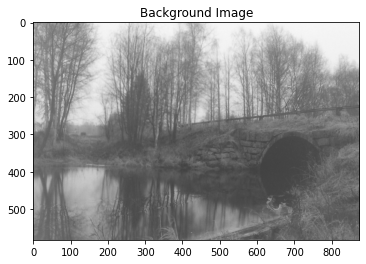

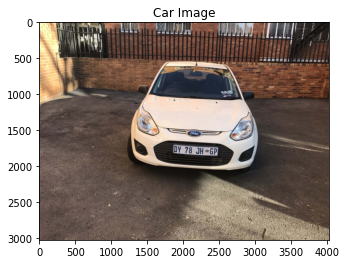

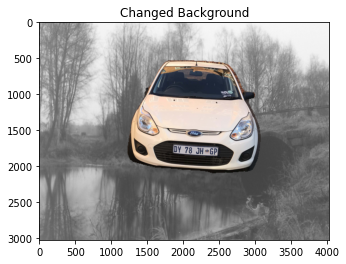

In [31]:
bg= Image.open('../Data/Blurred_imgs/1_Low_contrast.png')
Fg_img = Image.open('../Data/Original_imgs/view1.jpeg')
chg_bg_im = Image.open('Output/new_background.jpg')

plt.title("Background Image")
plt.imshow(np.asarray(bg))
plt.show()
plt.title("Car Image")
plt.imshow(np.asarray(Fg_img))
plt.show()
plt.title("Changed Background")
plt.imshow(np.asarray(chg_bg_im))
plt.show()

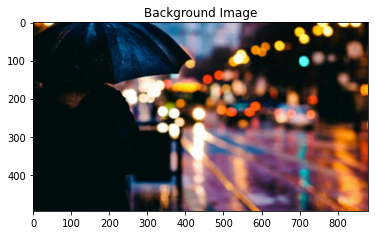

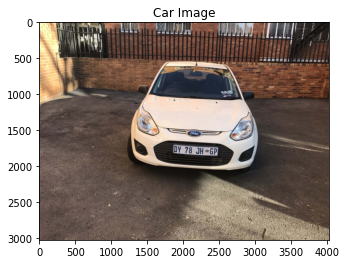

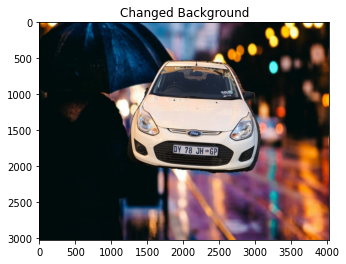

In [32]:
bg= Image.open('../Data/Blurred_imgs/1.jpg')
Fg_img = Image.open('../Data/Original_imgs/view1.jpeg')
chg_bg_im = Image.open('Output/new_img_background.jpg')

plt.title("Background Image")
plt.imshow(np.asarray(bg))
plt.show()
plt.title("Car Image")
plt.imshow(np.asarray(Fg_img))
plt.show()
plt.title("Changed Background")
plt.imshow(np.asarray(chg_bg_im))
plt.show()

Summary: 
    PixelLib package with the help of DeepLab V3 Background removal task was done. (Semantic Segmentation)
    

## Task 5: Image Stablization technique.
ROI should always be in the center of the image. 

Steps to get the image at the center
1. Get the ROI using MRCNN or Yolo object detection model 
2. ROI Bounding box + some padding and crop the image so that the ROI is at the center of an Image. or Shift the ROI to the center of the image. 